<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Log%C3%ADstica%20II/Parcial_1_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
Dmensual=30
Danual=Dmensual*12
DesvEstMensual=8
Costo_por_importacion=860 # si N>= 3: 760
c=114 #/ton
Transporte_Origen=1400 #/contenedor
capacidad=30
Formalidades_Aduaneras=0.002 # del FOB
Manipulacion_origen= 937  #/Contenedor
Transporte_principal=3800 #/contenedor
Seguro=0.03 # del FOB
Manipulacion_destino=1250 #/contenedor
Costo_importacion_fijo1= 250 # + 0.1% del FOB
Costo_importacion_fijo2=0.001 # del FOB
Impuesto_Dian=0.3 # del FOB
Transporte_bodega=700 #/contenedor
Tau=1.8 # meses
i=0.15
Alpha=0.95

Primer punto, costo de importar un contenedor:

FOB = Costo de mercancia + Manipulación en origen + formalidades aduaneras por exportación

FOB= (Capacidad*costo unitario + Manipulación en origen)/(1-0.2%)

In [ ]:
n=1
Q=n*capacidad
FOB= (Q*c + Manipulacion_origen*n+ Transporte_Origen*n)/(1-Formalidades_Aduaneras)
if Danual/Q < 3:
  Costo_por_importacion=860
else:
  Costo_por_importacion=760

In [ ]:
Costo_Formalidades_Aduaneras=FOB*Formalidades_Aduaneras
Costo_Seguro=FOB*Seguro
Costo_importacion_fijo=Costo_importacion_fijo1+Costo_importacion_fijo2*FOB
Costo_Impuesto_Dian=Impuesto_Dian*FOB

In [ ]:
CostoTotalImportacion=(Costo_por_importacion + Transporte_Origen*n + Q*c + Manipulacion_origen*n + Costo_Formalidades_Aduaneras + Transporte_principal*n + 
                      Costo_Seguro + Costo_importacion_fijo + Costo_Impuesto_Dian+ Manipulacion_destino*n)
CostoTotalImportacion

13737.922845691384

Punto 2: Costo anual de inventario en bodega si Q= a un contenedor lleno

In [ ]:
cprima = CostoTotalImportacion/Q
T=Q/Danual*12
SSbodega=round(DesvEstMensual*math.sqrt(T+Tau)*norm.ppf(Alpha))
Costo_inv_bodega = i*cprima*(Q/2+SSbodega)
Costo_inv_bodega

2541.515726452906

Punto 3 y 4: Tamaño de Lote Optimo y Costo Optimo

In [ ]:
CostoOptimo=''
Qs=np.zeros(400)
Costos=np.zeros(400)
for Q in range(1,401):
  n=math.ceil(Q/capacidad)
  N=Danual/Q
  FOB= (Q*c + Manipulacion_origen*n+ Transporte_Origen*n)/(1-Formalidades_Aduaneras)
  if Danual/Q < 3:
    Costo_por_importacion=860
  else:
    Costo_por_importacion=760


  T=Q/Danual*12
  SSbodega=round(DesvEstMensual*math.sqrt(T+Tau)*norm.ppf(Alpha))

  Costo_Formalidades_Aduaneras=FOB*Formalidades_Aduaneras
  Costo_Seguro=FOB*Seguro
  Costo_importacion_fijo=Costo_importacion_fijo1+Costo_importacion_fijo2*FOB
  Costo_Impuesto_Dian=Impuesto_Dian*FOB

  CostoTotalImportacion=N*(Costo_por_importacion + Transporte_Origen*n + Q*c + Manipulacion_origen*n + Costo_Formalidades_Aduaneras + Transporte_principal*n
                           + Costo_Seguro + Costo_importacion_fijo + Costo_Impuesto_Dian+ Manipulacion_destino*n)
  cprima = CostoTotalImportacion/Q/N
  Costo_inv_bodega = i*cprima*(Q/2+SSbodega)
  Costo_inv_transito = i*c*Danual*Tau/12

  CostoTotal=CostoTotalImportacion+Costo_inv_bodega+Costo_inv_transito
  if CostoOptimo=='':
    CostoOptimo=CostoTotal
    QOptimo=Q
    nOptimo=n
    NOptimo=N
    SSbodegaOptimo=SSbodega
  elif CostoOptimo>CostoTotal:
    CostoOptimo=CostoTotal
    QOptimo=Q
    nOptimo=n
    NOptimo=N
    SSbodegaOptimo=SSbodega
  Qs[Q-1]=Q
  Costos[Q-1]=CostoTotal
print('\nCosto Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo,
      '\nInventario de seguridad en la bodega:',SSbodegaOptimo)


Costo Optimo= 162532.37226786907 
Con Q optimo= 90 
Con n Optimo= 3 
Con N Optimo= 4.0 
Inventario de seguridad en la bodega: 29


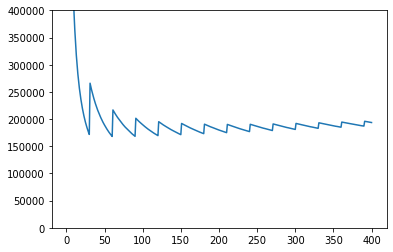

In [ ]:
plt.plot(Qs,Costos)
plt.ylim((0,400000))
plt.show()

Punto Opcional

In [ ]:
i=0.3

In [ ]:
CostoOptimo2=''
Qs2=np.zeros(400)
Costos2=np.zeros(400)
for Q in range(1,401):
  n=math.ceil(Q/capacidad)
  N=Danual/Q
  FOB= (Q*c + Manipulacion_origen*n+ Transporte_Origen*n)/(1-Formalidades_Aduaneras)
  if Danual/Q < 3:
    Costo_por_importacion=860
  else:
    Costo_por_importacion=760

  
  T=Q/Danual*12
  SSbodega=round(DesvEstMensual*math.sqrt(T+Tau)*norm.ppf(Alpha))

  Costo_Formalidades_Aduaneras=FOB*Formalidades_Aduaneras
  Costo_Seguro=FOB*Seguro
  Costo_importacion_fijo=Costo_importacion_fijo1+Costo_importacion_fijo2*FOB
  Costo_Impuesto_Dian=Impuesto_Dian*FOB

  CostoTotalImportacion=N*(Costo_por_importacion + Transporte_Origen*n + Q*c + Manipulacion_origen*n + Costo_Formalidades_Aduaneras + Transporte_principal*n 
                           + Costo_Seguro + Costo_importacion_fijo + Costo_Impuesto_Dian+ Manipulacion_destino*n)
  cprima = CostoTotalImportacion/Q/N
  Costo_inv_bodega = i*cprima*(Q/2+SSbodega)
  Costo_inv_transito = i*c*Danual*Tau/12

  CostoTotal=CostoTotalImportacion+Costo_inv_bodega+Costo_inv_transito
  if CostoOptimo2=='':
    CostoOptimo2=CostoTotal
    QOptimo2=Q
    nOptimo2=n
    NOptimo2=N
    SSbodegaOptimo2=SSbodega
  elif CostoOptimo2>CostoTotal:
    CostoOptimo2=CostoTotal
    QOptimo2=Q
    nOptimo2=n
    NOptimo2=N
    SSbodegaOptimo2=SSbodega
  Qs2[Q-1]=Q
  Costos2[Q-1]=CostoTotal
print('\nCosto Optimo=',CostoOptimo2,'\nCon Q optimo=',QOptimo2,'\nCon n Optimo=',nOptimo2,'\nCon N Optimo=',NOptimo2,
      '\nInventario de seguridad en la bodega:',SSbodegaOptimo2)


Costo Optimo= 168052.31094188377 
Con Q optimo= 60 
Con n Optimo= 2 
Con N Optimo= 6.0 
Inventario de seguridad en la bodega: 26


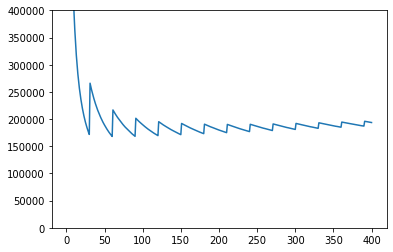

In [ ]:
plt.plot(Qs2,Costos2)
plt.ylim((0,400000))
plt.show()

In [ ]:
print('El nuevo Q óptimo con i = 30% es:',QOptimo2,'Es decir, un cambio en',(QOptimo2-QOptimo)/QOptimo*100,'%')

El nuevo Q óptimo con i = 30% es: 300 Es decir, un cambio en -23.076923076923077 %
